<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modules-for-this-notebook" data-toc-modified-id="Modules-for-this-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modules for this notebook</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Trees" data-toc-modified-id="Trees-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trees</a></span><ul class="toc-item"><li><span><a href="#Another-fact-about-trees" data-toc-modified-id="Another-fact-about-trees-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Another fact about trees</a></span></li></ul></li><li><span><a href="#How-many-trees-are-there?" data-toc-modified-id="How-many-trees-are-there?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How many trees are there?</a></span><ul class="toc-item"><li><span><a href="#Cayley's-Formula" data-toc-modified-id="Cayley's-Formula-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cayley's Formula</a></span></li><li><span><a href="#Computing-the-Prüfer--code" data-toc-modified-id="Computing-the-Prüfer--code-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Computing the Prüfer  code</a></span></li><li><span><a href="#Making-a-tree-from-a-Prüfer-code" data-toc-modified-id="Making-a-tree-from-a-Prüfer-code-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Making a tree from a Prüfer code</a></span></li></ul></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercises</a></span></li></ul></div>

<h1>CS4423-Networks: Lecture 9 [$\color{green}{\text{Final}}$]</h1>

<h1>Week 5, Lecture 2: Trees and Algorithms</h1>
Niall Madden, 
School of Mathematical and Statistical Sciences  
University of Galway


This Jupyter notebook, and PDF and HTML versions, can be found at https://www.niallmadden.ie/2425-CS4423/#Week05

<div class="rc"><font size="-1"><em>This notebook was written by Niall Madden, adapted from notebooks by Angela Carnevale.</em></div>

## Modules for this notebook
Today, we'll default to light rose-coloured nodes, with has an RGB code of `#ffc5cb`. For more options, see 
https://matplotlib.org/stable/users/explain/colors/colors.html

In [1]:
import networkx as nx
import numpy as np
opts = { "with_labels": True,  "node_color": '#ffc5cb' } # show labels; rose noodes

## Example

Short discussion (again) of paths and cycles, and connected componets

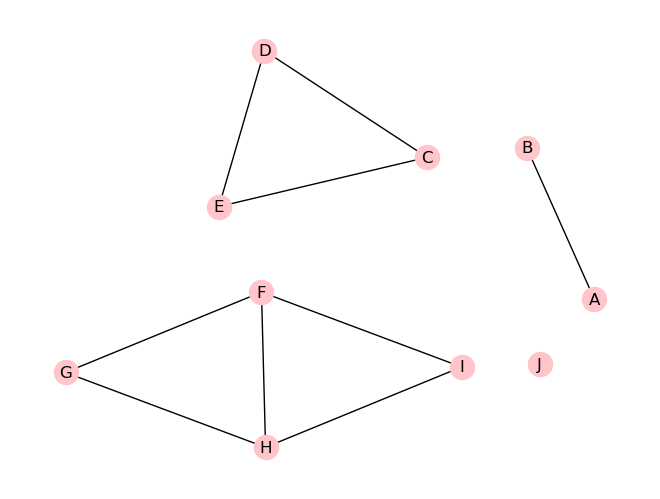

In [2]:
nodes = 'ABCDEFGHIJ'
edges = ['AB', 'CD', 'DE', 'CE', 'FG', 'FH', 'FI', 'GH', 'HI']
G2 = nx.Graph()
G2.add_nodes_from(nodes)
G2.add_edges_from(edges)
nx.draw_kamada_kawai(G2, **opts)

* A cycle in a simple graph provides, for any two nodes on that cycle, (at least) two different paths from one to the other.
* It can be useful to provide alternative routes for connectivity in case one of the edges should fail (e.g. in a electricity networks). 
* $(C,D,E,C)$ is a 3-cycle; there are others too.
* The graph is not connected: there are 4 connected components.

##  Trees

* A graph is called **acyclic** if it does not contain any cycles.

*    A <b>tree</b> is a (simple) graph that is <b>connected</b> and <b>acyclic</b>.

In other words, between any two vertices in a tree there is **exactly one simple path**.

Trees can be characterized in many different ways.



**Theorem.**  Let $G = (X, E)$ be a (simple) graph of order $n = |X|$
and size $m = |E|$.
Then the following are equivalent:

* $G$ is a tree (i.e. acyclic and connected);

* $G$ is connected and $m = n-1$;

* $G$ is a minimally connected graph (i.e., removing any edge will disconnect $G$);

* $G$ is acyclic and $m = n-1$;

* $G$ is a maximally acyclic graph (i.e., adding any edge will introduce a cycle in $G$).
* There is a unique path between each pair of nodes in $G$.

### Another fact about trees

**All trees are bipartite.** There are a few ways of thinking about this. One is the a graph is bipartite if has no cycles of odd-length. Since a tree has no cycles - it must be bipartite!

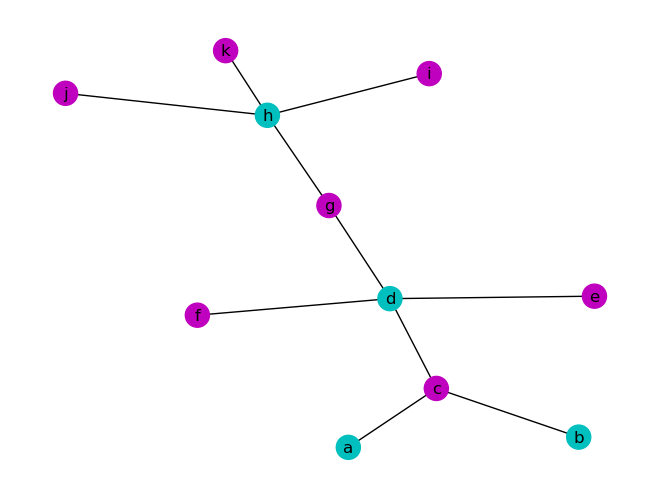

In [3]:
G3 = nx.Graph(["ac","bc","cd","de", "df", "dg","gh", "hi", "hj", "hk"])
top,bottom = nx.bipartite.sets(G3)
G3_colours = ['c' if node in top else 'm' for node in G3.nodes()]
nx.draw(G3, node_color=G3_colours, with_labels=True   )

## How many trees are there?
1. There is one tree with a single node.
2. There is also just one tree with two nodes.
3. We can easily see that there are 3 trees with 3 nodes (see notes on the board).
4. After that, it gets a little harder to count!

### Cayley's Formula
<b>Theorem (Cayley's Formula).</b>
    There are exactly $n^{n-2}$ distinct (labelled) trees on the $n$-element vertex set 
    $X = \{0, 1, 2, \dots, n-1\}$, if $n > 1$.
    
We'll later see why this is true.    But let's see what the numbers look like:

In [4]:
domain = range(2, 10)
print(np.array([domain, [n**(n-2) for n in domain]]))

[[      2       3       4       5       6       7       8       9]
 [      1       3      16     125    1296   16807  262144 4782969]]


To see why this is true, we'll learn about [**Prüfer Codes**](https://en.wikipedia.org/wiki/Pr%C3%BCfer_sequence).

Let's look at an example: a tree of order $n=7$

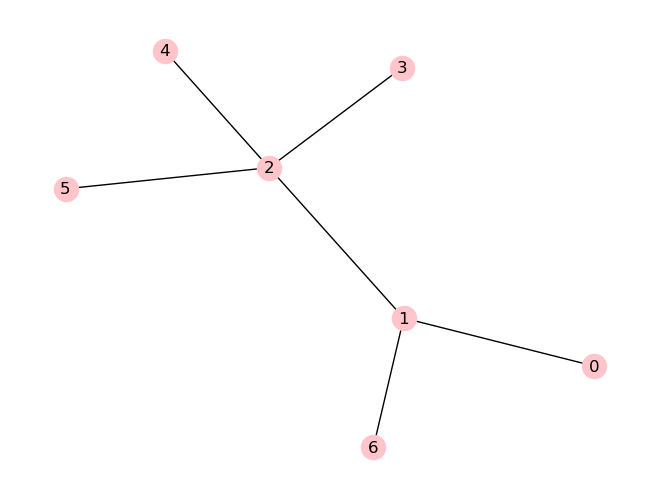

In [5]:
T4 = nx.Graph()
T4.add_nodes_from(range(0,7))
T4.add_edges_from([(0,1),(1,2),(2,3),(2,4),(2,5),(1,6)])
nx.draw(T4, **opts)

### Computing the Prüfer  code

How to determine the Prüfer code of a tree $T$ (destructively):

* Start with a tree, $T$ with nodes labeled $0, 1, \dots, n-1$, and empty list $\mathbf{a}$.
1. Find the **leaf** $x$ with the smallest label (a "_leaf_" is a node of degree 1. Every tree must have at least 2).
2. Append the label of its unique neighbour, $y$ to the list $\mathbf{a}$
3. Remove $x$ (and the edge $x - y$) from $T$.
4. Repeat Steps 1-3 until $T$ has only $2$ nodes left.
We now have the code as a list of length $n-2$.

So the graph above has Pruefer code $\{1,2,2,2,1\}$

We'll write some code to compute the Prufer code of a tree. 

Since the algorithm is recursive, we first write a function that does Steps 1-3: 
* Find the **leaf** `x` with the smallest label
* Set `y` to be its neighbour.
* Delete `x` from `T`
* Return `y`

One of the steps involves finding the neighbour of $x$. A minor technical issue is that the method `T.neighbours(x)` returns a iterable. To get its one and only item, we'll use the `next()` function (there are a few other ways to do this, including converting it to a list)`.


In [6]:
# Does Steps 1-3 of the Algorithm
def pruefer_node(tree):
    for x in tree:   # go through nodes in order
        if tree.degree(x) == 1:  # first one of degree 1 (is a leaf)
            y = next(tree.neighbors(x))  # y is its only neighbour
            tree.remove_node(x)
            return(y)

Since our function destroys the list, we'll make a copy before we start. Also, since we know the list has length $n-2$, we just call this function $n-2$ times, adding the value returned to the list:

In [7]:
n = T4.order()
T = T4.copy()
a = [] # empty list 
for k in range(n-2):
    y = pruefer_node(T)
    a+=[y] 
print(a)

[1, 2, 2, 2, 1]


If you prefer list comprehension:

In [8]:
T = T4.copy()
a = [pruefer_node(T) for k in range(n-2)]
print(a)

[1, 2, 2, 2, 1]


Let's wrap this up as a `python` function

In [9]:
def pruefer_code(tree):
    return [pruefer_node(tree) for k in range(tree.order() - 2)]

Test it:

In [10]:
T = T4.copy()
code = pruefer_code(T)
code

[1, 2, 2, 2, 1]

### Making a tree from a Prüfer code
Maybe surprisingly, the tree can be reconstructed from its Prüfer code.  This is based on the following fact
and shows that the map from trees to codes is a bijection!


<b>Fact:</b> The degree of node $x$ is $1$ plus the number of entries $x$ in the Prüfer code of $T$.

**Example**

In [11]:
d = n*[1] # list of n 1's/
for k in code:
    d[k] += 1
print(f"degree list: {d}")

degree list: [1, 3, 4, 1, 1, 1, 1]


In [12]:
print(f'Check: {[T4.degree[x] for x in T4]}')

Check: [1, 3, 4, 1, 1, 1, 1]


*How to compute a tree from a Prüfer code `a`*
(Note that `a` is a list of length $n-2$, with all entries numbers $0$ to $n-1$).

1. Set `G` to be a graph with node list `[0, 1, 2, ..., n-1]` (and no edges yet).
2. Compute the list of node degrees `d`  from the code.
3. For $k=0, 1, \dots n-2$
   * Set `y=a[k]`
   * Set `x` to be the node with smallest degree in `d`
   * Add the edge `(x,y)` to `G`
   * Set `d[x]=d[x]-1` and `d[y]=d[y]-1` (i.e., decrease the degrees of both `x` and `y` by $1$).
4. Finally, connect the remaining $2$ nodes of degrees $1$ by an edge.

_Tip_: if `d` is a list, `d.index(1)` returns the index of the first entry of `d` that has the value `1`.

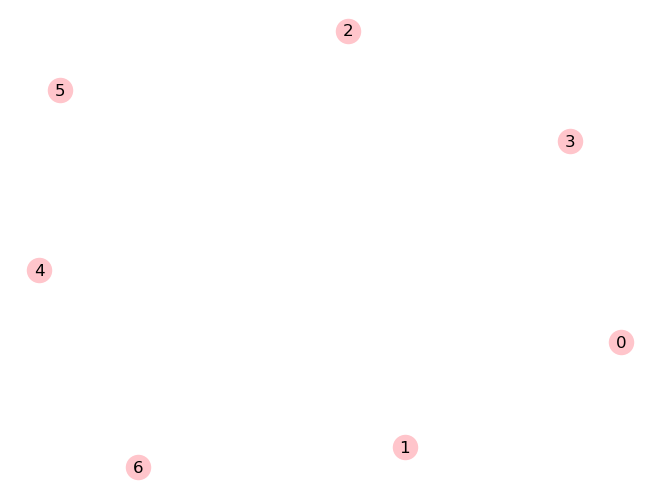

In [13]:
T4a = nx.empty_graph( T4.order() )
nx.draw(T4a, **opts)

In [14]:
code

[1, 2, 2, 2, 1]

In [15]:
d = n*[1] # list of n 1's/
for k in code:
    d[k] += 1
# repeat n-2 times:
for k in range(n-2):
    y = a[k]
    x = d.index(1) # firsty
    T4a.add_edge(x, y)
    d[x] -= 1;  d[y] -= 1
    print(f'Degrees = {d} : adding edge {x}-{y}')


Degrees = [0, 2, 4, 1, 1, 1, 1] : adding edge 0-1
Degrees = [0, 2, 3, 0, 1, 1, 1] : adding edge 3-2
Degrees = [0, 2, 2, 0, 0, 1, 1] : adding edge 4-2
Degrees = [0, 2, 1, 0, 0, 0, 1] : adding edge 5-2
Degrees = [0, 1, 0, 0, 0, 0, 1] : adding edge 2-1


Add the final edge, by find the index to the remaining two 1's. We can find the first with `x=d.index(1)`, and the second with `y=d.index(1, x+1)` (could also use list comprehension, of course: see below).

In [16]:
x = d.index(1)
y = d.index(1, x+1)
T4a.add_edge(x,y)

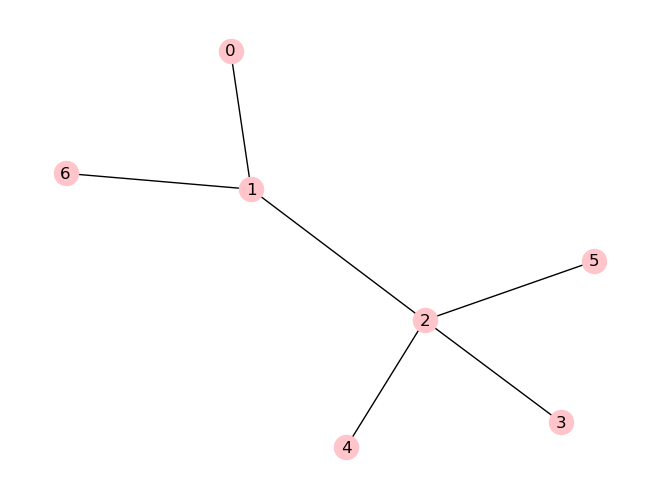

In [17]:
nx.draw(T4a, **opts)

<div class="alert alert-block alert-info">Finished here Wednesday</div>

Turn the entire procedure into a `python` function:

In [18]:
def pruefer_to_tree(code):
    # initialize graph and defects
    n = len(code) + 2
    tree = nx.empty_graph(n)
    d = n*[1]
    for y in code:
        d[y] += 1
        
    # add edges
    for y in code:
        x = d.index(1) 
        tree.add_edge(x, y)
        d[x]-=1; d[y]-=1;                
    # final edge
    e = [x for x in tree if d[x] == 1]
    tree.add_edge(*e)
    return tree

Let's check it works:

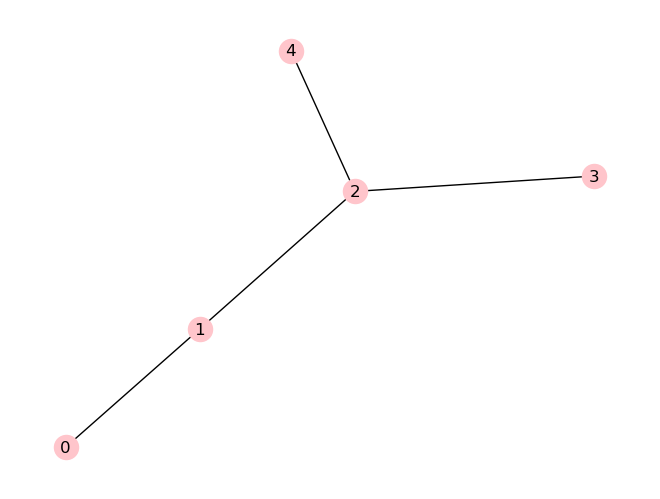

In [19]:
T4b = pruefer_to_tree([1,2,2])
nx.draw(T4b, **opts)

Since we have now sown that there is a bijection between labeled trees and Prüfer codes, we can prove Cayley's Theorem easily:
* A tree with $n$ nodes has a Prüfer code of length $n-2$.
* There are $n$ choices for each entry in the code.
* So there are $n^{n-2}$ possible codes for a tree with $n$ nodes
* So there are $n^{n-2}$ possible trees with $n$ nodes.

## Exercises

1.  A tree $T$ uniquely determines its Prüfer code,
and hence the two nodes that remain after (destructively)
computing the code.   What are those two nodes, in terms of
properties of $T$, or its Prüfer code?

2. 
    1. What tree has Prüfer code $[0, 1, 2, \dots, n-3]$?
    2. What tree has Prüfer code $[\underbrace{0, 0, 0, \dots, 0}_{n-2 \text{ zeros}}]$?
    3. What tree has Prüfer code $[0, 1, 2, \dots, n-3]$?

3. Give the Prüfer for the tree with nodes $\{0,1,2,3,4,5\}$ and edges $0-1$, $0-2$, $1-3$, $1-4$, $2-5$

